In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [60]:
customers_df=pd.read_csv('Customers.csv')

In [61]:
customers_df.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [62]:
customers_df.tail()

,CustomerID,CustomerName,Region,SignupDate
195,C0196,Laura Watts,Europe,2022-06-07
196,C0197,Christina Harvey,Europe,2023-03-21
197,C0198,Rebecca Ray,Europe,2022-02-27
198,C0199,Andrea Jenkins,Europe,2022-12-03
199,C0200,Kelly Cross,Asia,2023-06-11


In [63]:
products_df=pd.read_csv('Products.csv')

In [64]:
products_df.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [65]:
products_df.tail()

,ProductID,ProductName,Category,Price
95,P096,SoundWave Headphones,Electronics,307.47
96,P097,BookWorld Cookbook,Books,319.34
97,P098,SoundWave Laptop,Electronics,299.93
98,P099,SoundWave Mystery Book,Books,354.29
99,P100,HomeSense Sweater,Clothing,126.34


In [66]:
transactions_df=pd.read_csv('Transactions.csv')

In [67]:
transactions_df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [68]:
transactions_df.tail()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86
999,T00992,C0024,P037,2024-04-21 10:52:24,1,459.86,459.86


In [69]:
customers_df.describe()

,CustomerID,CustomerName,Region,SignupDate
count,200,200,200,200
unique,200,200,4,179
top,C0001,Lawrence Carroll,South America,2024-11-11
freq,1,1,59,3


In [70]:
products_df.describe()

,Price
count,100.000000
mean,267.551700
std,143.219383
min,16.080000
25%,147.767500
50%,292.875000
75%,397.090000
max,497.760000


In [71]:
transactions_df.describe()

,Quantity,TotalValue,Price
count,1000.000000,1000.000000,1000.00000
mean,2.537000,689.995560,272.55407
std,1.117981,493.144478,140.73639
min,1.000000,16.080000,16.08000
25%,2.000000,295.295000,147.95000
50%,3.000000,588.880000,299.93000
75%,4.000000,1011.660000,404.40000
max,4.000000,1991.040000,497.76000


## Data Cleaning

In [72]:

merged_df = transactions_df.merge(customers_df, on='CustomerID', how='left')
merged_df = merged_df.merge(products_df, on='ProductID', how='left')


merged_df.head()


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


In [73]:
# Define a function to calculate outliers
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Check for outliers in TotalValue
total_value_outliers = detect_outliers(merged_df, 'TotalValue')
print(f"Outliers in TotalValue:\n{total_value_outliers[['TransactionID', 'TotalValue']]}")


Outliers in TotalValue:
Empty DataFrame
Columns: [TransactionID, TotalValue]
Index: []


In [74]:
# # Remove outliers in TotalValue
# Q1 = merged_df['TotalValue'].quantile(0.25)
# Q3 = merged_df['TotalValue'].quantile(0.75)
# IQR = Q3 - Q1
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR
# merged_df = merged_df[(merged_df['TotalValue'] >= lower_bound) & (merged_df['TotalValue'] <= upper_bound)]
# merged_df['TotalValue'] = merged_df['TotalValue'].clip(lower=lower_bound, upper=upper_bound)
# merged_df['Log_TotalValue'] = merged_df['TotalValue'].apply(lambda x: np.log1p(x))


In [75]:
# Check for missing values
print("Missing values in Customers:\n", customers_df.isnull().sum())
print("\nMissing values in Products:\n", products_df.isnull().sum())
print("\nMissing values in Transactions:\n", transactions_df.isnull().sum())


Missing values in Customers:
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Missing values in Products:
 ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Missing values in Transactions:
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [76]:
# Drop the 'Price_x' column and rename 'Price_y' to 'Price'
merged_df.drop('Price_x', axis=1, inplace=True)
merged_df.rename(columns={'Price_y': 'Price'}, inplace=True)


In [77]:
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])

In [78]:
merged_df.shape

(1000, 12)

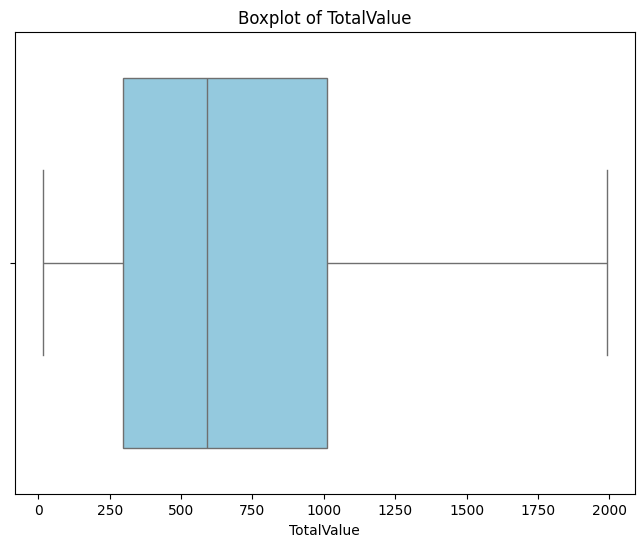

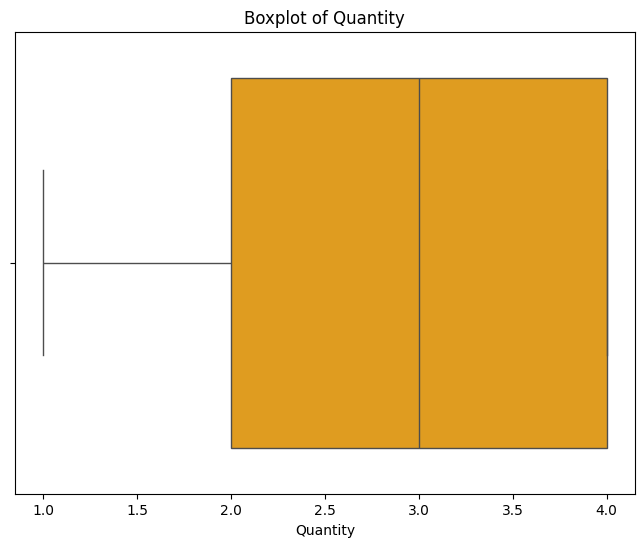

In [79]:
import seaborn as sns

# Boxplot for TotalValue
plt.figure(figsize=(8, 6))
sns.boxplot(x=merged_df['TotalValue'], color='skyblue')
plt.title('Boxplot of TotalValue')
plt.show()


# Boxplot for Quantity
plt.figure(figsize=(8, 6))
sns.boxplot(x=merged_df['Quantity'], color='orange')
plt.title('Boxplot of Quantity')
plt.show()


In [80]:
merged_df.nunique()

,0
TransactionID,1000
CustomerID,199
ProductID,100
TransactionDate,1000
Quantity,4
TotalValue,369
CustomerName,199
Region,4
SignupDate,178
ProductName,66


In [81]:
merged_df.isnull().sum()

,0
TransactionID,0
CustomerID,0
ProductID,0
TransactionDate,0
Quantity,0
TotalValue,0
CustomerName,0
Region,0
SignupDate,0
ProductName,0


In [82]:
# Compute the correlation matrix for numeric columns
numerical_df = merged_df.select_dtypes(include=['number'])
correlation_matrix = numerical_df.corr()

# Print the correlation matrix
print(correlation_matrix)


            Quantity  TotalValue     Price
Quantity    1.000000    0.609972 -0.009378
TotalValue  0.609972    1.000000  0.722714
Price      -0.009378    0.722714  1.000000


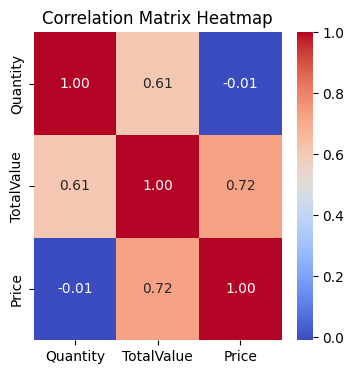

In [83]:
# Compute the correlation matrix for numerical columns
numerical_df = merged_df.select_dtypes(include=['number'])
correlation_matrix = numerical_df.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(4, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()


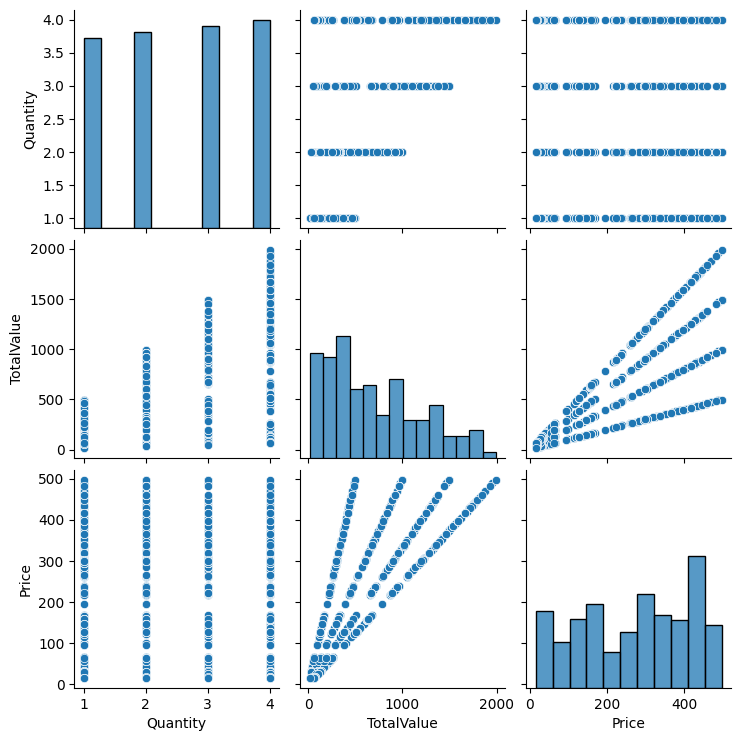

In [84]:
sns.pairplot(merged_df)

In [85]:
merged_df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,CustomerName,Region,SignupDate,ProductName,Category,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


In [86]:
# Save merged_df as a CSV file
merged_df.to_csv("merged_data.csv", index=False)

# Confirm the file is saved
print("merged_data.csv saved successfully!")


merged_data.csv saved successfully!


In [87]:
# Frequency distribution of 'Category' column
category_counts = merged_df['Category'].value_counts()
print(category_counts)

# Frequency distribution of 'Region' column
region_counts = merged_df['Region'].value_counts()
print(region_counts)

# Frequency distribution of 'CustomerName' column (optional)
customer_counts = merged_df['CustomerName'].value_counts()
print(customer_counts)


Category
Books          270
Electronics    254
Home Decor     248
Clothing       228
Name: count, dtype: int64
Region
South America    304
North America    244
Europe           234
Asia             218
Name: count, dtype: int64
CustomerName
Abigail Jones      11
William Adams      11
Paul Parsons       10
Matthew Johnson    10
Gerald Hines       10
                   ..
Zachary Turner      1
Deborah Wilcox      1
Amber Gonzalez      1
Julia Palmer        1
Elizabeth Wells     1
Name: count, Length: 199, dtype: int64


In [104]:


# Count transactions per customer
customer_transaction_counts = merged_df.groupby(['CustomerID', 'CustomerName', 'Region']).size().reset_index(name='TransactionCount')

# Get top customers (e.g., customers with the most transactions)
top_customers = customer_transaction_counts.sort_values(by='TransactionCount', ascending=False)

# Display regions of top customers
print("Regions of Top Customers:")
print(top_customers[['CustomerName', 'Region', 'TransactionCount']].head(10))


Regions of Top Customers:
        CustomerName         Region  TransactionCount
155    William Adams  North America                11
108    Abigail Jones  North America                11
174  Matthew Johnson           Asia                10
140     Paul Parsons         Europe                10
64      Gerald Hines  North America                10
7           David Li  North America                10
83    Belinda Garner           Asia                 9
74     Misty Higgins         Europe                 9
164    Juan Mcdaniel  South America                 9
146    Hunter Fuller  South America                 9


<ipython-input-88-879ec8390f60>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Category', data=merged_df, palette='Set2')


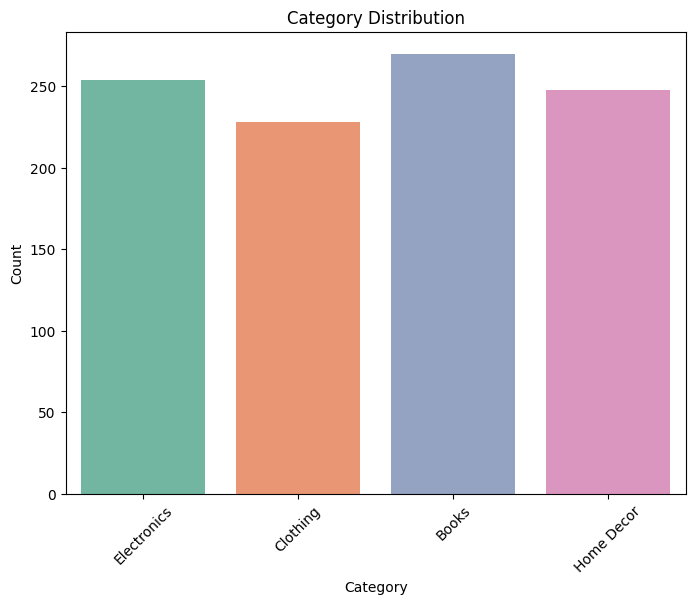

<ipython-input-88-879ec8390f60>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Region', data=merged_df, palette='Set3')


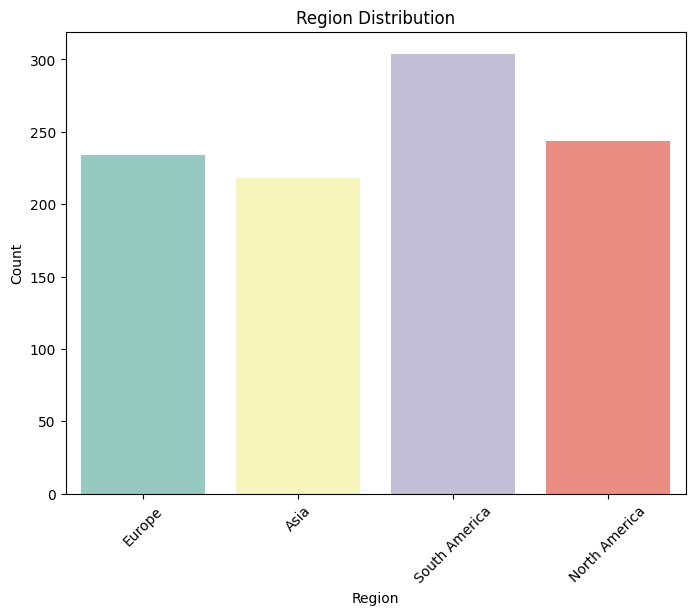

In [88]:
# Bar plot for 'Category' column
plt.figure(figsize=(8, 6))
sns.countplot(x='Category', data=merged_df, palette='Set2')
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Bar plot for 'Region' column
plt.figure(figsize=(8, 6))
sns.countplot(x='Region', data=merged_df, palette='Set3')
plt.title('Region Distribution')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


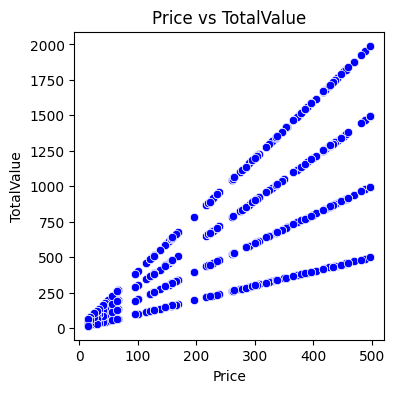

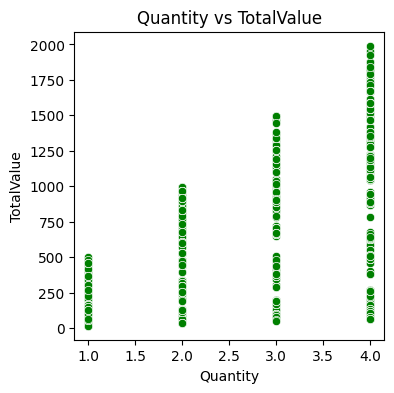

In [90]:
# Scatter plot between 'Price' and 'TotalValue'
plt.figure(figsize=(4, 4))
sns.scatterplot(x='Price', y='TotalValue', data=merged_df, color='blue')
plt.title('Price vs TotalValue')
plt.xlabel('Price')
plt.ylabel('TotalValue')
plt.show()

# Scatter plot between 'Quantity' and 'TotalValue'
plt.figure(figsize=(4, 4))
sns.scatterplot(x='Quantity', y='TotalValue', data=merged_df, color='green')
plt.title('Quantity vs TotalValue')
plt.xlabel('Quantity')
plt.ylabel('TotalValue')
plt.show()


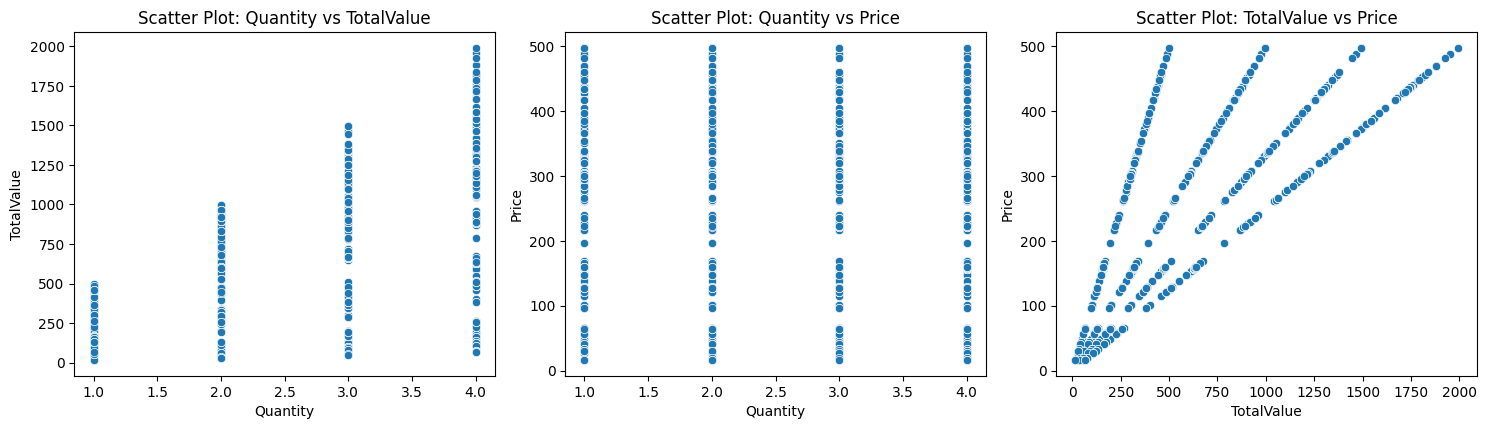

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations

# Select only numerical columns
numerical_df = merged_df.select_dtypes(include=['number'])

# Generate all possible pairs of numerical columns
column_pairs = combinations(numerical_df.columns, 2)

# Plot scatter plots for each pair
plt.figure(figsize=(15, 12))
for i, (col1, col2) in enumerate(column_pairs, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(x=numerical_df[col1], y=numerical_df[col2])
    plt.title(f'Scatter Plot: {col1} vs {col2}')
    plt.xlabel(col1)
    plt.ylabel(col2)

plt.tight_layout()
plt.show()


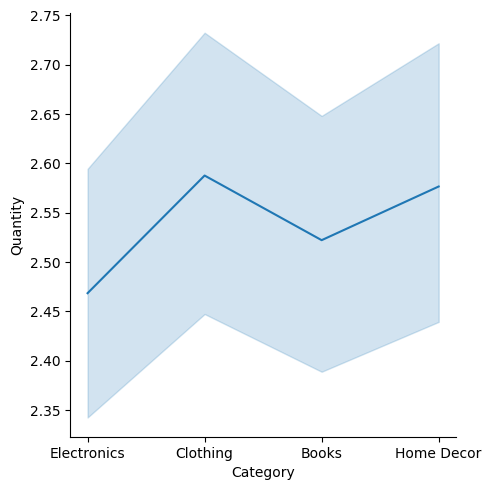

In [92]:
sns.relplot(x='Category', y='Quantity', data=merged_df,kind='line')

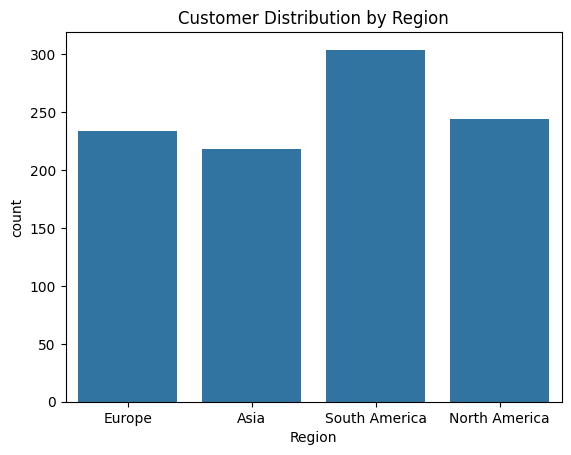

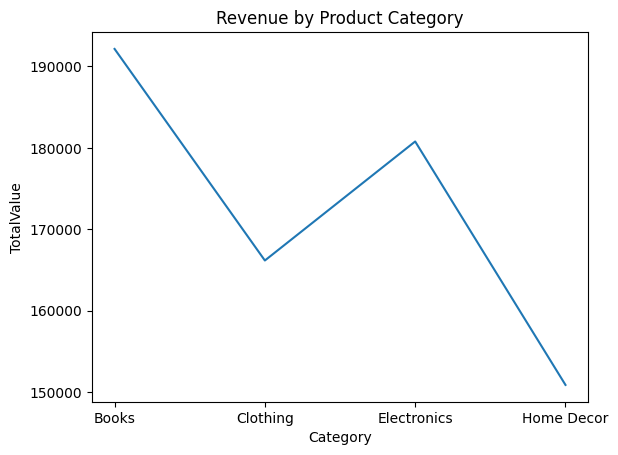

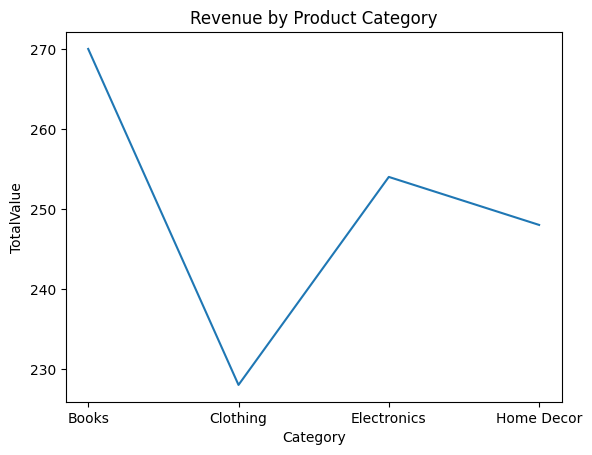

In [95]:

# Visualizations
sns.countplot(x='Region', data=merged_df)
plt.title('Customer Distribution by Region')
plt.show()

aggregated_data = merged_df.groupby('Category').agg({'TotalValue': 'sum'}).reset_index()
sns.lineplot(x='Category', y='TotalValue', data=aggregated_data)
plt.title('Revenue by Product Category')
plt.show()


sns.lineplot(x='Category', y='TotalValue', data=merged_df.groupby('Category').count().reset_index())
plt.title('Revenue by Product Category')
plt.show()



In [93]:
sales_by_region = merged_df.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
print("Sales by Region:\n", sales_by_region)


Sales by Region:
 Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


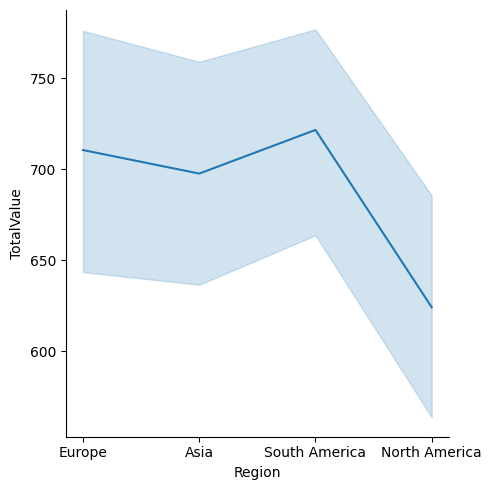

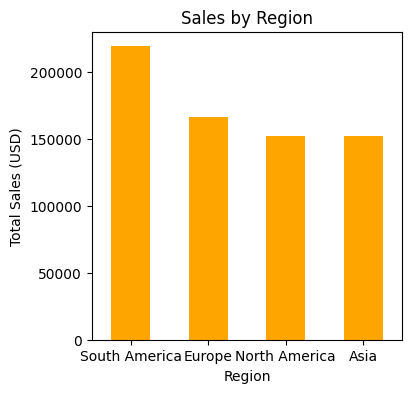

In [94]:
sns.relplot(x='Region', y='TotalValue', data=merged_df, kind='line')

# Calculate sales by region
sales_by_region = merged_df.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(4, 4))
sales_by_region.plot(kind='bar', color='orange')
plt.title('Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales (USD)')
plt.xticks(rotation=0)
plt.show()

Category Performance:
 Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64


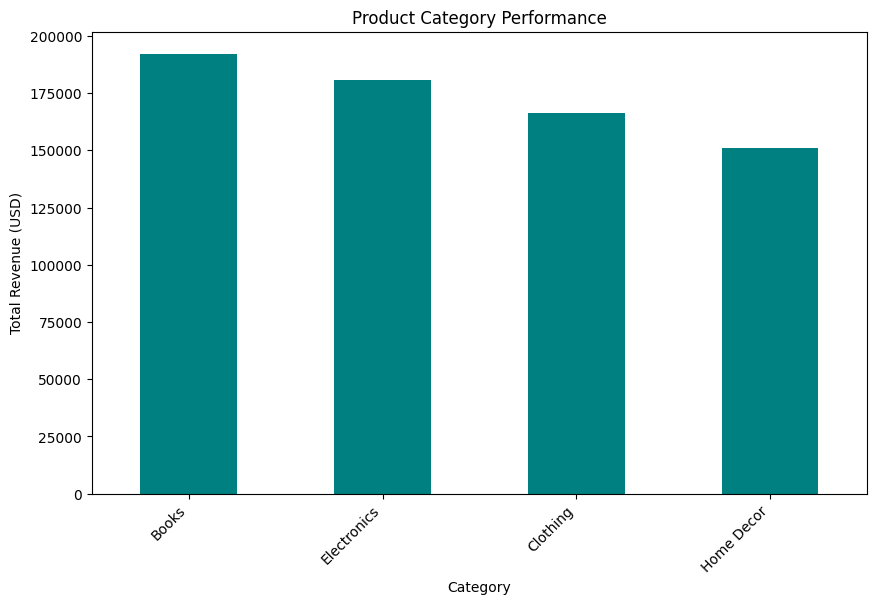

In [100]:
category_performance = merged_df.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
print("Category Performance:\n", category_performance)

# Calculate category performance
category_performance = merged_df.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
category_performance.plot(kind='bar', color='teal')
plt.title('Product Category Performance')
plt.xlabel('Category')
plt.ylabel('Total Revenue (USD)')
plt.xticks(rotation=45, ha='right')
plt.show()



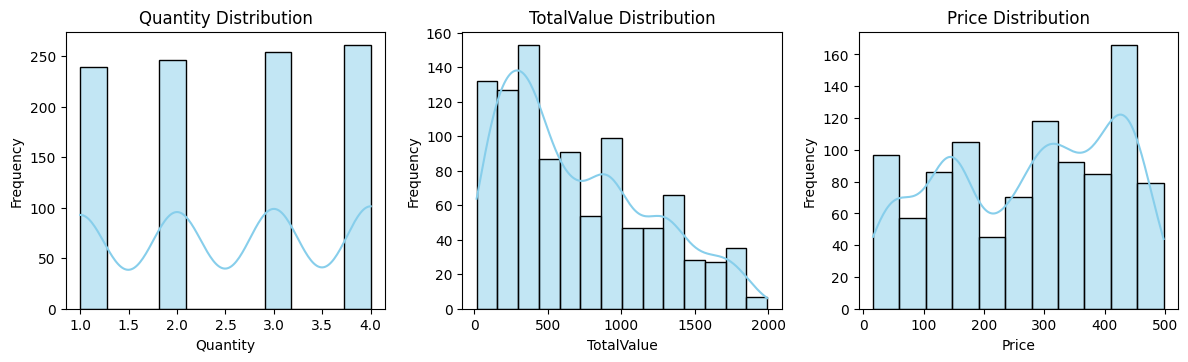

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns
numerical_df = merged_df.select_dtypes(include=['number'])

# Create histograms for all numerical columns
plt.figure(figsize=(12, 10))
for i, column in enumerate(numerical_df.columns, 1):
    plt.subplot(3, 3, i)  # Adjust the number of rows and columns as needed
    sns.histplot(numerical_df[column], kde=True, color='skyblue')
    plt.title(f'{column} Distribution')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()  # Adjusts layout to prevent overlap
plt.show()


In [98]:
top_products = merged_df.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)
print("Top-Selling Products:\n", top_products)


Top-Selling Products:
 ProductName
ActiveWear Smartwatch    100
SoundWave Headphones      97
HomeSense Desk Lamp       81
ActiveWear Rug            79
SoundWave Cookbook        78
ActiveWear Jacket         76
BookWorld Biography       71
TechPro T-Shirt           66
SoundWave Desk Lamp       64
TechPro Textbook          62
Name: Quantity, dtype: int64


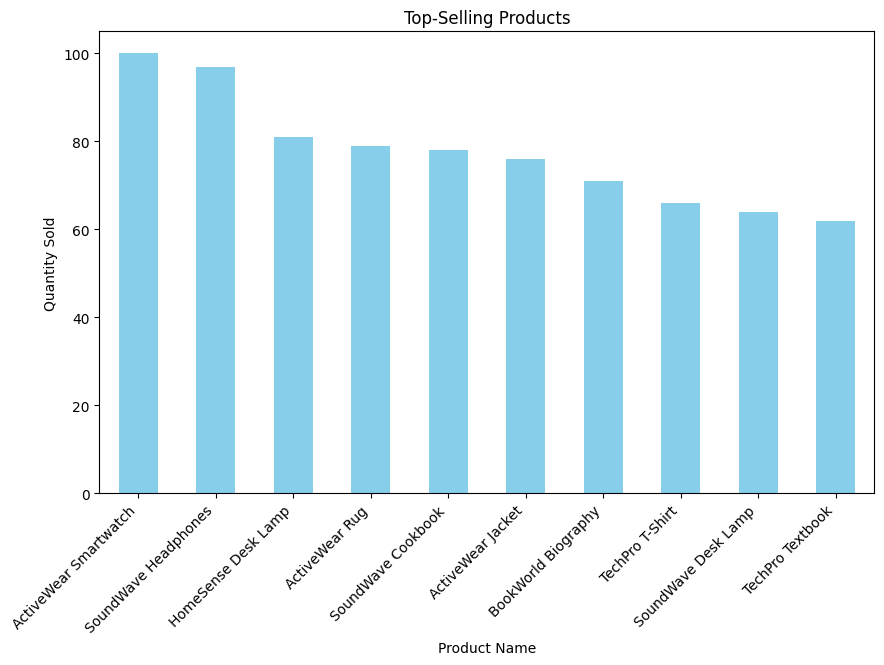

In [99]:
import matplotlib.pyplot as plt

# Calculate top-selling products
top_products = merged_df.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
top_products.plot(kind='bar', color='skyblue')
plt.title('Top-Selling Products')
plt.xlabel('Product Name')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.show()


In [105]:
import pandas as pd

# Convert 'TransactionDate' to datetime format
merged_df['TransactionDate'] = pd.to_datetime(merged_df['TransactionDate'])

# Group by month and calculate total revenue for each month
revenue_trends = merged_df.groupby(merged_df['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()

# Print the monthly revenue trends in the console
print("Monthly Revenue Trends:")
print(revenue_trends)


Monthly Revenue Trends:
TransactionDate
2023-12     3769.52
2024-01    66376.39
2024-02    51459.27
2024-03    47828.73
2024-04    57519.06
2024-05    64527.74
2024-06    48771.18
2024-07    71366.39
2024-08    63436.74
2024-09    70603.75
2024-10    47063.22
2024-11    38224.37
2024-12    59049.20
Freq: M, Name: TotalValue, dtype: float64


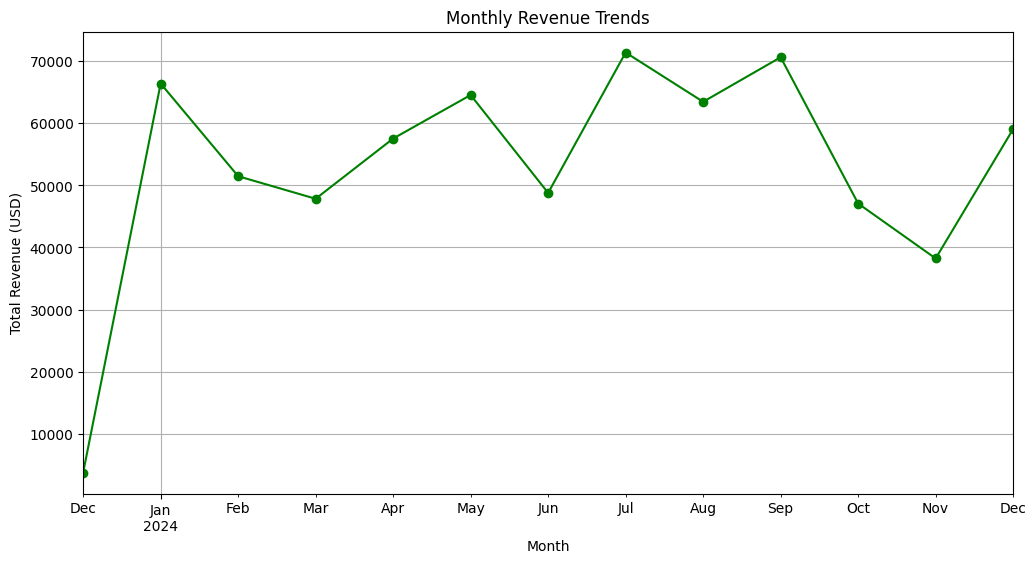

In [102]:
# Calculate monthly revenue
revenue_trends = merged_df.groupby(merged_df['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()

# Plot
plt.figure(figsize=(12, 6))
revenue_trends.plot(kind='line', marker='o', color='green')
plt.title('Monthly Revenue Trends')
plt.xlabel('Month')
plt.ylabel('Total Revenue (USD)')
plt.grid(True)
plt.show()


Top-Spending Customers:
 CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
C0188     7111.32
C0059     7073.28
C0028     6819.57
C0099     6715.72
C0165     6708.10
Name: TotalValue, dtype: float64


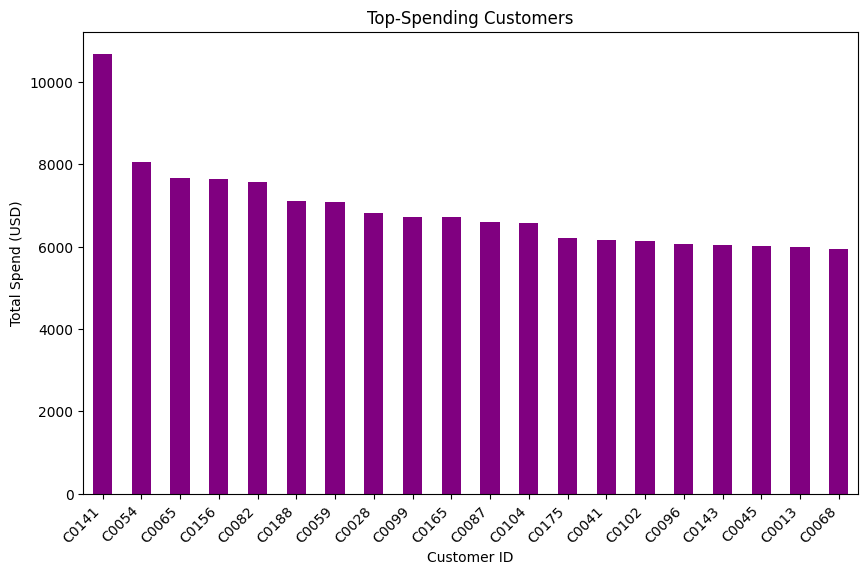

In [101]:
top_customers = merged_df.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10)
print("Top-Spending Customers:\n", top_customers)

# Calculate top-spending customers
top_customers = merged_df.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(20)

# Plot
plt.figure(figsize=(10, 6))
top_customers.plot(kind='bar', color='purple')
plt.title('Top-Spending Customers')
plt.xlabel('Customer ID')
plt.ylabel('Total Spend (USD)')
plt.xticks(rotation=45, ha='right')
plt.show()

